<a href="https://colab.research.google.com/github/yassirsalmi/USA_Housing_notebook/blob/main/USA_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# linear regression - USA Housing

### Problem Statement: House Sale Price Prediction

Objective:

To develop a Machine Learning model that can predict the sale price of a house based on characteristics of its surroundings and the property itself.

Available Data:

The dataset contains the following columns:

 - Avg. Area Income: Average income in the neighborhood
 - Avg. Area House Age: Average age of houses in the neighborhood
 - Avg. Area Number of Rooms: Average number of rooms per house in the neighborhood
 - Avg. Area Number of Bedrooms: Average number of bedrooms per house in the neighborhood
 - Area Population: Population of the geographic area
 - Price: Sale price of the house
 - Address: Address of the house


### Installing/Loading packages

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

path = '/content/drive/MyDrive/Classroom/Machine learning Master sciences de données/USA_Housing.csv'
data = pd.read_csv(path)

In [4]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Data Preprocessing

In [ ]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
df = data.rename(columns={'Avg. Area Income':'avg_area_income', 'Avg. Area House Age':'Avg_Area_House_Age',
            'Avg. Area Number of Rooms':'Avg_Area_Number_of_Rooms', 'Avg. Area Number of Bedrooms':'Avg_Area_Number_of_Bedrooms',
            'Area Population': 'Area_Population'},)

df.head()

,avg_area_income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Data Visualization

show the columns names and change them to a descriptive names

In [34]:
X = df[['avg_area_income','Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms','Avg_Area_Number_of_Bedrooms','Area_Population']]
y = df['Price']

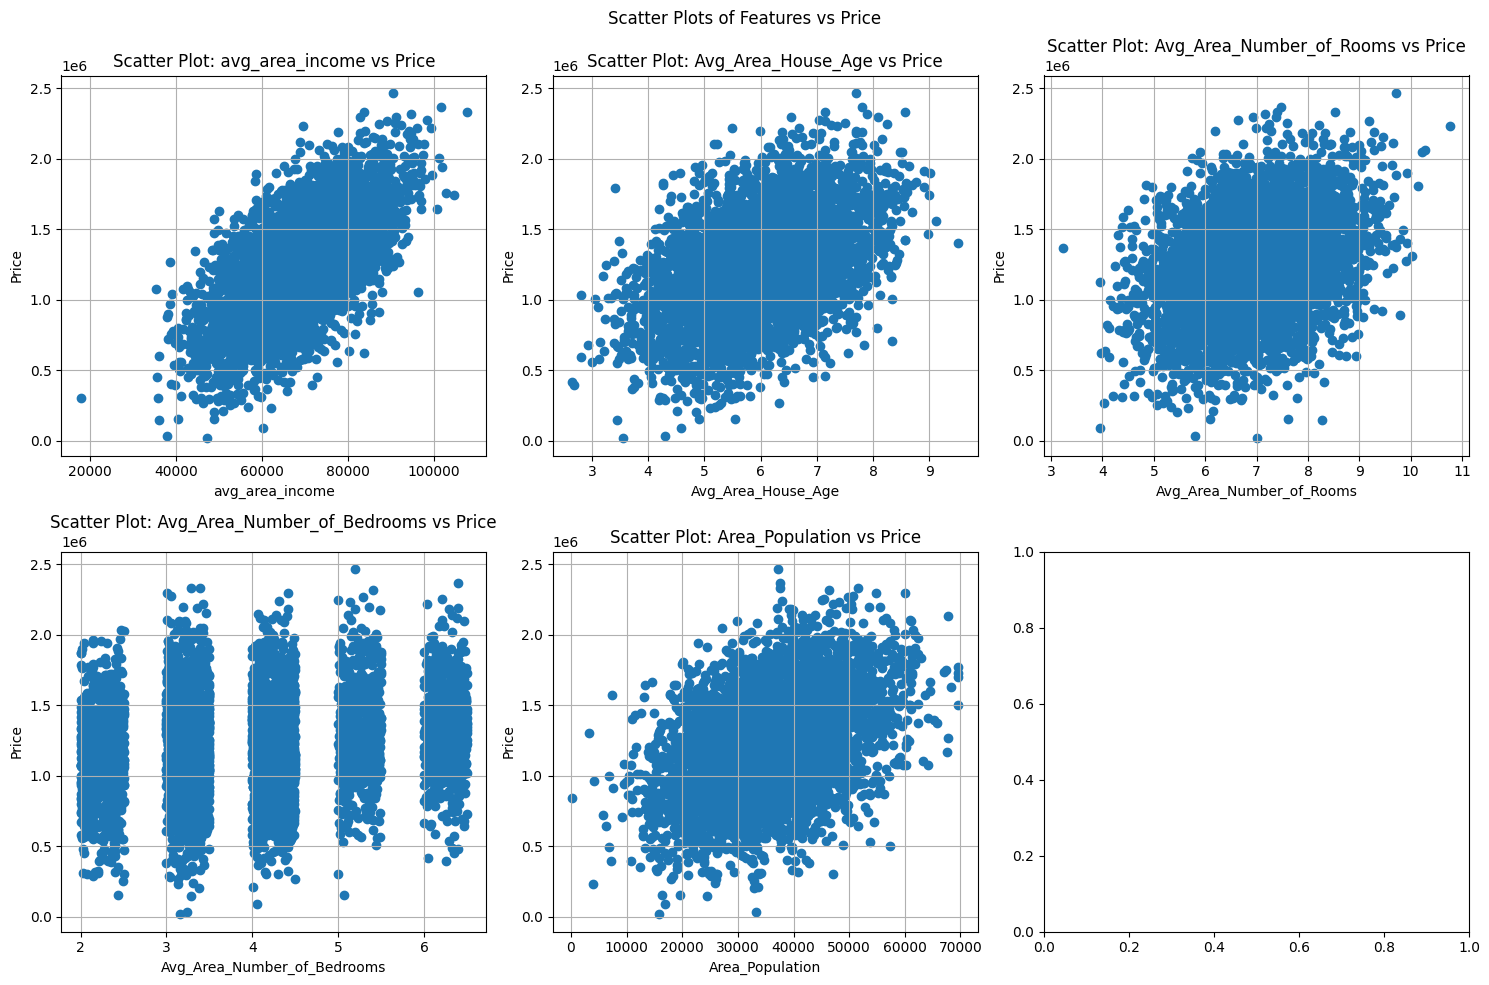

In [51]:
features = ['avg_area_income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
            'Avg_Area_Number_of_Bedrooms', 'Area_Population']

rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

feature_index = 0
for i in range(rows):
    for j in range(cols):
        if feature_index < len(features):
            ax = axes[i, j]
            ax.scatter(X[features[feature_index]], y)
            ax.set_xlabel(features[feature_index])
            ax.set_ylabel('Price')
            ax.set_title(f'Scatter Plot: {features[feature_index]} vs Price')
            ax.grid(True)
            feature_index += 1

fig.suptitle('Scatter Plots of Features vs Price', fontsize=12)

plt.tight_layout()

plt.show()

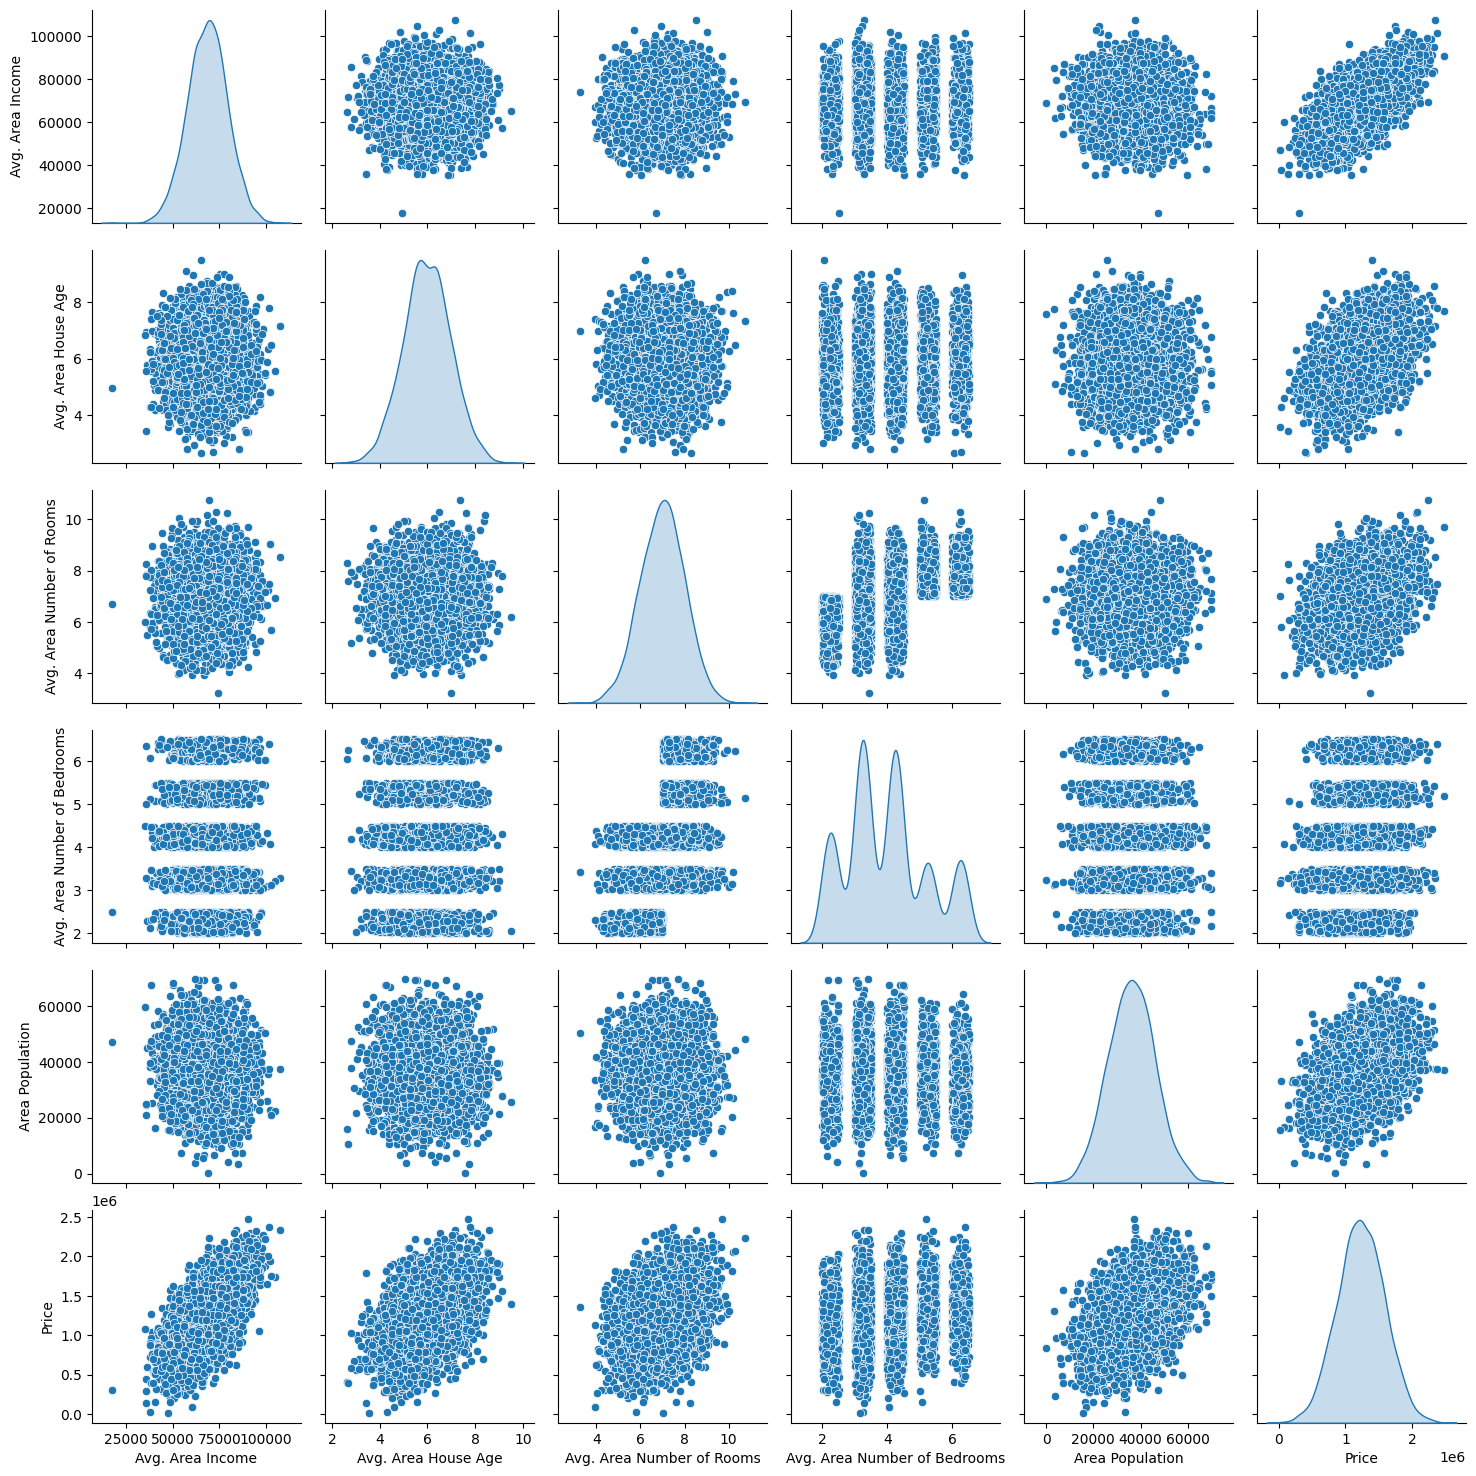

In [42]:

sns.pairplot(data, diag_kind="kde")
plt.show()


<ipython-input-44-1f756df288d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

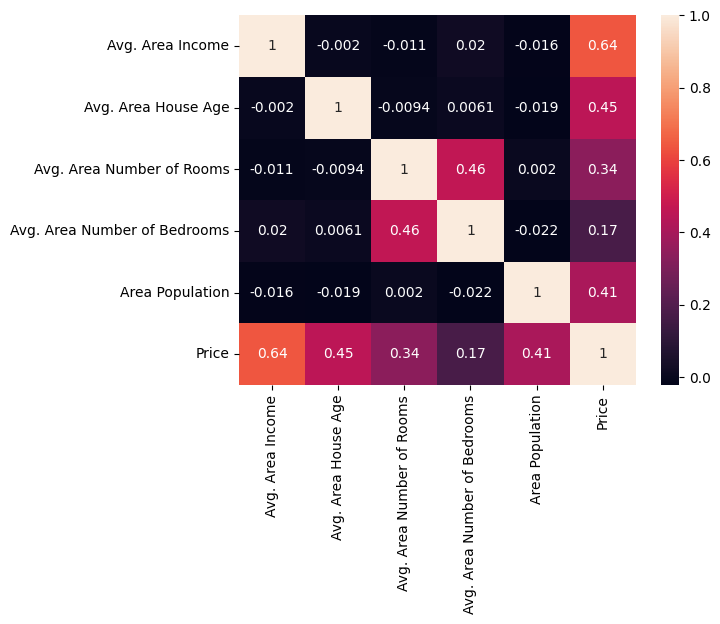

In [44]:
sns.heatmap(data.corr(), annot = True)


## Training & Testing

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

In [45]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
avg_area_income,21.652206
Avg_Area_House_Age,164666.480722
Avg_Area_Number_of_Rooms,119624.012232
Avg_Area_Number_of_Bedrooms,2440.377611
Area_Population,15.270313


In [46]:
print(model.intercept_)

-2635072.900933358


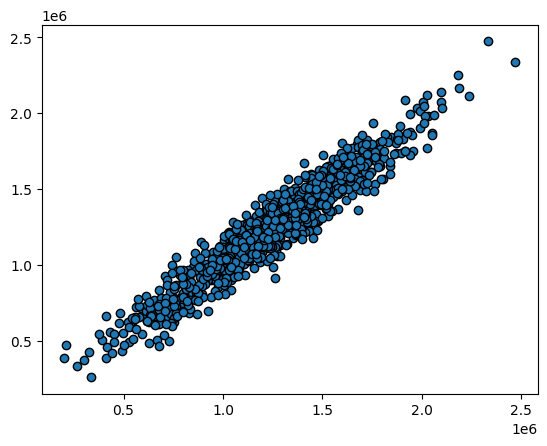

In [50]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, edgecolor='black')

In [40]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (Test Set):", mse)
print("R-squared (Test Set):", r2)

Mean Squared Error (Test Set): 10089009300.894518
R-squared (Test Set): 0.9179971706834289
